## **Data Loading**

In [130]:
from PIL import Image
import os
from pathlib import Path
import shutil
import filecmp
import matplotlib.pyplot as plt


In [131]:
base_dir = Path("data")
target_dir = base_dir / "images"
target_dir.mkdir(exist_ok=True)

In [132]:
existing_files = {f.name for f in target_dir.iterdir() if f.is_file()}

for folder in base_dir.iterdir():
    if folder.is_dir() and folder.name != "images":
        for image_file in folder.iterdir():
            if image_file.is_file():
                dest_file = target_dir / image_file.name
                if image_file.name not in existing_files:
                    shutil.move(str(image_file), str(dest_file))
                    existing_files.add(image_file.name)
                elif not filecmp.cmp(image_file, dest_file, shallow=False):
                    print(f"Conflict: {image_file} and {dest_file} differ.")


Conflict: data/data7/96367.jpg and data/images/96367.jpg differ.
Conflict: data/data5/82197.jpg and data/images/82197.jpg differ.
Conflict: data/data2/68070.jpg and data/images/68070.jpg differ.
Conflict: data/data2/2462.jpg and data/images/2462.jpg differ.
Conflict: data/data2/82197.jpg and data/images/82197.jpg differ.
Conflict: data/data3/68070.jpg and data/images/68070.jpg differ.
Conflict: data/data3/82197.jpg and data/images/82197.jpg differ.
Conflict: data/data3/40035.jpg and data/images/40035.jpg differ.
Conflict: data/data4/68070.jpg and data/images/68070.jpg differ.
Conflict: data/data4/54502.jpg and data/images/54502.jpg differ.
Conflict: data/data4/82197.jpg and data/images/82197.jpg differ.


There are some conflicts but, at the moment, I don't care. As a result, we should have 100k images in the images directory.

In [133]:
image_dir = Path("data/images")

image_info = []

for img_file in image_dir.glob("*.*"):
    try:
        with Image.open(img_file) as img:
            size = img.size  # (width, height)
            file_size = img_file.stat().st_size  # in bytes
            image_info.append({
                "filename": img_file.name,
                "dimensions": size,
                "file_size_bytes": file_size
            })
    except Exception as e:
        print(f"Error opening {img_file.name}: {e}")

for info in image_info[:5]:  # adjust number to see more
    print(f"{info['filename']}: {info['dimensions']} px, {info['file_size_bytes']} bytes")

show_images = True
if show_images:
    for img_file in list(image_dir.glob("*.*"))[:3]:
        try:
            with Image.open(img_file) as img:
                img.show(title=img_file.name)
        except Exception as e:
            print(f"Could not open {img_file.name}: {e}")


Error opening 68070.jpg: cannot identify image file '/Users/martinaserandrei/Desktop/cv-project/data/images/68070.jpg'
Error opening 82197.jpg: cannot identify image file '/Users/martinaserandrei/Desktop/cv-project/data/images/82197.jpg'
9733.jpg: (1280, 720) px, 79879 bytes
14147.jpg: (1280, 720) px, 59027 bytes
86425.jpg: (1280, 720) px, 82845 bytes
52112.jpg: (1280, 720) px, 30305 bytes
89716.jpg: (1280, 720) px, 60558 bytes


All images have format (1280, 720).

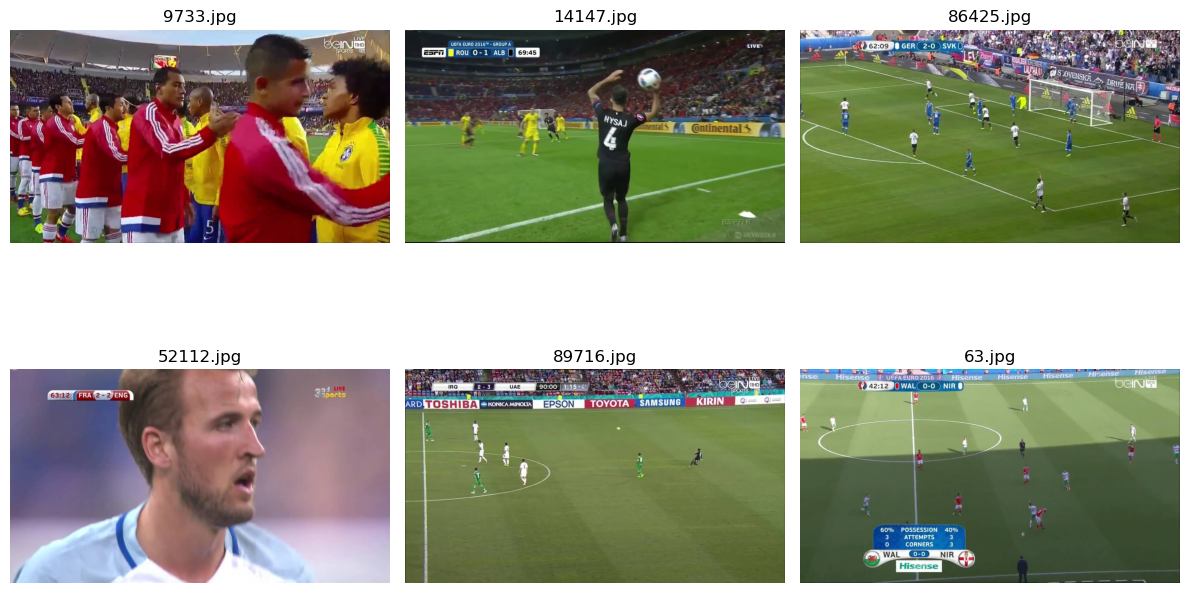

In [134]:
image_files = list(image_dir.glob("*.*"))[:6]  # Adjust number as needed

# Plot images
plt.figure(figsize=(12, 8))

for i, img_path in enumerate(image_files):
    try:
        img = Image.open(img_path)
        plt.subplot(2, 3, i + 1)  # 2 rows, 3 columns
        plt.imshow(img)
        plt.title(img_path.name)
        plt.axis("off")
    except Exception as e:
        print(f"Failed to load {img_path.name}: {e}")

plt.tight_layout()
plt.show()

## Preprocessing

In [135]:
# open excel labels
import pandas as pd

labels_df = pd.read_excel('labels.xlsx')


In [136]:
# from second column, rename column name with the strings in the first row
def rename_columns(df):
    new_columns = df.iloc[0]
    df.columns = new_columns
    df = df[1:]
    return df

labels_df = rename_columns(labels_df)

In [137]:
# drop the first column
labels_df = labels_df.drop(labels_df.columns[0], axis=1)

In [138]:
labels_df.head()

0 Gate  Start/Restar the game The joy of the players yellow card Red Card  \
1     0                     0                      0           0        0   
2     0                     0                      0           0        0   
3     0                     0                      0           0        0   
4     0                     0                      0           0        0   
5     0                     0                      0           0        0   

0 Ball Stadium View referee Image Penalty Image Free Kick  
1    0            1             0             0         0  
2    0            1             1             0         0  
3    0            0             0             0         0  
4    0            0             1             0         0  
5    1            0             1             0         0

In [139]:
labels_df.columns

Index(['Gate ', 'Start/Restar the game', 'The joy of the players',
       'yellow card', 'Red Card', 'Ball', 'Stadium View', 'referee Image',
       'Penalty Image', 'Free Kick'],
      dtype='object', name=0)

In [147]:
for i in labels_df.columns:
    print(labels_df[i].value_counts())

Gate 
0    75991
1    24009
Name: count, dtype: int64
Start/Restar the game
0    99431
1      569
Name: count, dtype: int64
The joy of the players
0    98625
1     1375
Name: count, dtype: int64
yellow card
0    99409
1      591
Name: count, dtype: int64
Red Card
0    99929
1       71
Name: count, dtype: int64
Ball
0    52311
1    47689
Name: count, dtype: int64
Stadium View
0    95884
1     4116
Name: count, dtype: int64
referee Image
0    64643
1    35356
         1
Name: count, dtype: int64
Penalty Image
0    99460
1      540
Name: count, dtype: int64
Free Kick
0    97441
1     2559
Name: count, dtype: int64


Since there are some typos where in some cells there is written 11 instead of 1, I correct them.

In [148]:
for i in labels_df.columns:
    labels_df[i] = labels_df[i].replace(11, 1)

labels_df['referee Image'] = labels_df['referee Image'].replace(' ',0)

/var/folders/r9/tk3nsgjj4_j4z3n_rxsd7s580000gn/T/ipykernel_92356/1875788819.py:4: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  labels_df['referee Image'] = labels_df['referee Image'].replace(' ',0)


## Mutually exclusive events

In [149]:
# drop some columns
subset = labels_df.drop(columns=['Gate ', 'Ball', 'yellow card', 'Red Card', 'referee Image'])
# add a column to subset with the sum of the values in the other columns
subset['sum'] = subset.sum(axis=1)

subset['sum'].value_counts()

sum
0    91752
1     7338
2      909
3        1
Name: count, dtype: int64

In [150]:
subset[subset['sum'] == 3]

0     Start/Restar the game The joy of the players Stadium View Penalty Image  \
54828                     0                      0            1             1   

0      Free Kick sum  
54828          1   3

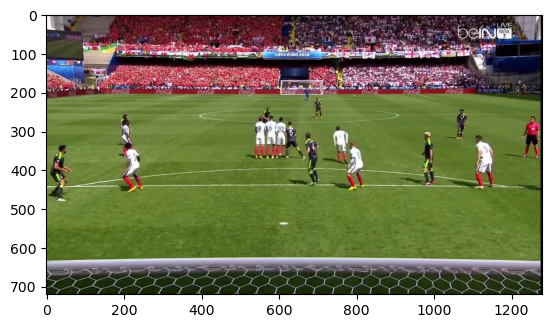

In [151]:
# display image 54828
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
img = mpimg.imread('data/images/54828.jpg')
plt.imshow(img)

This is a free kick not a penalty kick, should I correct the label?


In [152]:
# check which labels that sum to 2 are 1

subset[subset['sum'] == 2]

0     Start/Restar the game The joy of the players Stadium View Penalty Image  \
7999                      1                      0            1             0   
8000                      1                      0            1             0   
8010                      1                      0            1             0   
8019                      1                      0            1             0   
10336                     0                      1            1             0   
...                     ...                    ...          ...           ...   
99825                     1                      0            1             0   
99827                     1                      0            1             0   
99828                     1                      0            1             0   
99855                     0                      0            1             0   
99862                     0                      0            1             0   

0      Free Kick sum  
7999           0   2  
8000           0   2  
8010           0   2  
8019           0   2  
10336          0   2  
...          ...  ..  
99825          0   2  
99827          0   2  
99828          0   2  
99855          1   2  
99862          1   2  

[909 rows x 6 columns]

In [165]:
# drop some columns
subset2 = labels_df.drop(columns=['Gate ', 'Ball', 'referee Image', 'Start/Restar the game'])
subset2['sum'] = subset2.sum(axis=1)
subset2['sum'].value_counts()

sum
0    91420
1     7910
2      668
3        2
Name: count, dtype: int64

What if i consider also red and yellow card?

In [175]:
# drop some columns
subset3 = labels_df.drop(columns=['Gate ', 'Ball', 'referee Image'])

In [176]:
# add a column to subset with the sum of the values in the other columns
subset3['sum'] = subset3.sum(axis=1)
subset3['sum'].value_counts()

sum
0    91095
1     7991
2      912
3        2
Name: count, dtype: int64

Looking at the value counts almost all the new labeled images taken into consideration (red, yellow card) are mutually exclusive so we include them.

In [193]:
# take a sample of 2009 instances where 'sum' is 0
no_label = subset3[subset3['sum']==0]
no_label_sample = subset3.sample(n=2009, random_state=42)


In [194]:

# take only entries where 'sum' is 1
mutually_exclusive = subset3[subset3['sum']==1]


In [195]:
mutually_exclusive = pd.concat([mutually_exclusive, no_label_sample], ignore_index=False)
# create a new column from the index
mutually_exclusive['Image Number'] = mutually_exclusive.index 
# I want it to be the first column
mutually_exclusive = mutually_exclusive[['Image Number'] + [col for col in mutually_exclusive.columns if col != 'Image Number']]
mutually_exclusive

0      Image Number Start/Restar the game The joy of the players yellow card  \
1                 1                     0                      0           0   
2                 2                     0                      0           0   
94               94                     0                      0           1   
95               95                     0                      0           1   
96               96                     0                      0           1   
...             ...                   ...                    ...         ...   
13564         13564                     0                      0           0   
72262         72262                     0                      0           0   
70238         70238                     0                      0           0   
2784           2784                     0                      0           0   
41277         41277                     0                      0           0   

0     Red Card Stadium View Penalty Image  Free Kick sum  
1            0            1             0          0   1  
2            0            1             0          0   1  
94           0            0             0          0   1  
95           0            0             0          0   1  
96           0            0             0          0   1  
...        ...          ...           ...        ...  ..  
13564        0            0             0          0   0  
72262        0            0             0          0   0  
70238        0            0             0          0   0  
2784         0            0             0          0   0  
41277        0            0             0          0   0  

[10000 rows x 9 columns]

In [197]:
# create a new column 'Generic Moment' which is initialized to 0
mutually_exclusive['Generic Moment'] = 0
# where sum == 0, set Generic Moment to 1
mutually_exclusive.loc[mutually_exclusive['sum'] == 0, 'Generic Moment'] = 1
mutually_exclusive = mutually_exclusive.drop(columns=['sum'])
mutually_exclusive

0      Image Number Start/Restar the game The joy of the players yellow card  \
1                 1                     0                      0           0   
2                 2                     0                      0           0   
94               94                     0                      0           1   
95               95                     0                      0           1   
96               96                     0                      0           1   
...             ...                   ...                    ...         ...   
13564         13564                     0                      0           0   
72262         72262                     0                      0           0   
70238         70238                     0                      0           0   
2784           2784                     0                      0           0   
41277         41277                     0                      0           0   

0     Red Card Stadium View Penalty Image  Free Kick  Generic Moment  
1            0            1             0          0               0  
2            0            1             0          0               0  
94           0            0             0          0               0  
95           0            0             0          0               0  
96           0            0             0          0               0  
...        ...          ...           ...        ...             ...  
13564        0            0             0          0               1  
72262        0            0             0          0               1  
70238        0            0             0          0               1  
2784         0            0             0          0               1  
41277        0            0             0          0               1  

[10000 rows x 9 columns]

In [204]:
# based on the index of mutually_exclusive I want to take the same rows from the original labels_df
cropped_data = labels_df.loc[mutually_exclusive.index]
cropped_data['Generic Moment'] = mutually_exclusive['Generic Moment']
cropped_data.head()

0   Gate  Start/Restar the game The joy of the players yellow card Red Card  \
1       0                     0                      0           0        0   
2       0                     0                      0           0        0   
94      0                     0                      0           1        0   
95      0                     0                      0           1        0   
96      0                     0                      0           1        0   

0   Ball Stadium View  referee Image Penalty Image  Free Kick  Generic Moment  
1      0            1              0             0          0               0  
2      0            1              1             0          0               0  
94     1            0              1             0          0               0  
95     1            0              1             0          0               0  
96     1            0              1             0          0               0

In [205]:
cropped_data.to_csv('cropped_data.csv', index=False)

Now I check that each label is balanced

In [206]:
for i in cropped_data.columns:
    print(cropped_data[i].value_counts())

Gate 
0    5762
1    4238
Name: count, dtype: int64
Start/Restar the game
0    9662
1     338
Name: count, dtype: int64
The joy of the players
0    8644
1    1356
Name: count, dtype: int64
yellow card
0    9406
1     594
Name: count, dtype: int64
Red Card
0    9929
1      71
Name: count, dtype: int64
Ball
0    5789
1    4211
Name: count, dtype: int64
Stadium View
0    6699
1    3301
Name: count, dtype: int64
referee Image
0    6745
1    3255
Name: count, dtype: int64
Penalty Image
0    9536
1     464
Name: count, dtype: int64
Free Kick
0    7932
1    2068
Name: count, dtype: int64
Generic Moment
0    8171
1    1829
Name: count, dtype: int64


From what I see only the situations of 'Start/Restar the game', 'yellow card', 'Red Card' and 'Penalty Image' seem to have less instances but we cannot do much about them because we've taken all the instances from the original dataset. Actually it can make sense because those are moments that happen less frequently during a football match.